<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/RBM_Collaborative_filtering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install tensorflow==1.4.0

     |████████████████████████████████| 41.2MB 100kB/s 
     |████████████████████████████████| 1.7MB 46.0MB/s 
     |████████████████████████████████| 890kB 45.6MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=37524e5740b3a4de8fff95bd5b83a3127e28b979d7cefc715d8b3a3f999b7734
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [2]:
#Tensorflow library. Used to implement machine learning models
import tensorflow as tf
#Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
#Dataframe manipulation library
import pandas as pd
#Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving backup copy.csv to backup copy (1).csv


In [5]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings (2).csv


In [4]:
import io
hotel_data = pd.read_csv(io.BytesIO(uploaded['backup copy.csv']))

In [6]:
import io
rating_data = pd.read_csv(io.BytesIO(uploaded['ratings.csv']))

In [7]:
hotel_data.head()

,hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category
0,1,11th Avenue Hotel Hostel,1112 N Broadway,Denver,1,Rs.4754,"Hotels,Hostels,Hotels and motels,Lodging,Motel..."
1,2,1906 Lodge At Coronado Beach,1060 Adella Ave,Coronado,3,Rs.17370,"Resorts & Vacation Cottages,Hotels and motels,..."
2,3,21c Museum Hotel Lexington,167 W Main St,Lexington,4,Rs.12407,"Hotels,Hotels and motels,Hotel,Restaurants"
3,4,250 Main Hotel,250 Main St,Rockland,4,Rs.18200,"Hotels and motels,Hotel and motel reservations..."
4,5,402 Hotel #Thebigo,2211 Douglas St,Omaha,2,Rs.5656,"Hotels,Hotel and motel consultants,Hotels and ..."


In [8]:
rating_data.head()

,User_id,hotel_id,Rating
0,7747,1,1
1,14092,2,5
2,6086,3,1
3,10003,3,4
4,2625,4,5


In [9]:
hotel_data.dropna()

,hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category
0,1,11th Avenue Hotel Hostel,1112 N Broadway,Denver,1,Rs.4754,"Hotels,Hostels,Hotels and motels,Lodging,Motel..."
1,2,1906 Lodge At Coronado Beach,1060 Adella Ave,Coronado,3,Rs.17370,"Resorts & Vacation Cottages,Hotels and motels,..."
2,3,21c Museum Hotel Lexington,167 W Main St,Lexington,4,Rs.12407,"Hotels,Hotels and motels,Hotel,Restaurants"
3,4,250 Main Hotel,250 Main St,Rockland,4,Rs.18200,"Hotels and motels,Hotel and motel reservations..."
4,5,402 Hotel #Thebigo,2211 Douglas St,Omaha,2,Rs.5656,"Hotels,Hotel and motel consultants,Hotels and ..."
...,...,...,...,...,...,...,...
220,221,Best Western Carmel's Town House Lodge,5th And San Carlos PO Box 3574,Carmel by the Sea,1,Rs.9310,"Hotels,Lodging,Hotel"
222,223,Best Western Central Inn,45 Eisenhower Dr,Savannah,2,Rs.5844,"Hotel,Hotel and motel mgmt.,Hotels and motels,..."
223,224,Best Western Cityplace Inn,4150 N Central Expy,Dallas,2,Rs.5458,"Hotels Motels,Hotel"
224,225,Best Western Clermont,4004 Williams Drive,Cincinnati,2,Rs.6726,"Hotels,Lodging,Hotel"


In [10]:
rating_data.dropna()

,User_id,hotel_id,Rating
0,7747,1,1
1,14092,2,5
2,6086,3,1
3,10003,3,4
4,2625,4,5
...,...,...,...
1255,11160,200,4
1256,12329,200,1
1257,13324,200,1
1258,13698,200,3


In [11]:
len(hotel_data)


226

In [12]:
hotel_data.tail()


,hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category
221,222,Best Western Casino Inn,2466 Toomey Rd,Vinton,NaN,NaN,"Hotels,Lodging,Hotels and motels,Hotels Motels..."
222,223,Best Western Central Inn,45 Eisenhower Dr,Savannah,2,Rs.5844,"Hotel,Hotel and motel mgmt.,Hotels and motels,..."
223,224,Best Western Cityplace Inn,4150 N Central Expy,Dallas,2,Rs.5458,"Hotels Motels,Hotel"
224,225,Best Western Clermont,4004 Williams Drive,Cincinnati,2,Rs.6726,"Hotels,Lodging,Hotel"
225,226,Best Western Continental Inn,650 N Mollison Ave,El Cajon,2,Rs.10148,"Hotels,Hotel"


In [13]:
hotel_data['List Index'] = hotel_data.index
hotel_data.head()

,hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index
0,1,11th Avenue Hotel Hostel,1112 N Broadway,Denver,1,Rs.4754,"Hotels,Hostels,Hotels and motels,Lodging,Motel...",0
1,2,1906 Lodge At Coronado Beach,1060 Adella Ave,Coronado,3,Rs.17370,"Resorts & Vacation Cottages,Hotels and motels,...",1
2,3,21c Museum Hotel Lexington,167 W Main St,Lexington,4,Rs.12407,"Hotels,Hotels and motels,Hotel,Restaurants",2
3,4,250 Main Hotel,250 Main St,Rockland,4,Rs.18200,"Hotels and motels,Hotel and motel reservations...",3
4,5,402 Hotel #Thebigo,2211 Douglas St,Omaha,2,Rs.5656,"Hotels,Hotel and motel consultants,Hotels and ...",4


In [14]:
#Merging movies_df with ratings_df by MovieID
merged_data = hotel_data.merge(rating_data, on='hotel_id')

#Displaying the result
merged_data.head()

,hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index,User_id,Rating
0,1,11th Avenue Hotel Hostel,1112 N Broadway,Denver,1,Rs.4754,"Hotels,Hostels,Hotels and motels,Lodging,Motel...",0,7747,1
1,2,1906 Lodge At Coronado Beach,1060 Adella Ave,Coronado,3,Rs.17370,"Resorts & Vacation Cottages,Hotels and motels,...",1,14092,5
2,3,21c Museum Hotel Lexington,167 W Main St,Lexington,4,Rs.12407,"Hotels,Hotels and motels,Hotel,Restaurants",2,6086,1
3,3,21c Museum Hotel Lexington,167 W Main St,Lexington,4,Rs.12407,"Hotels,Hotels and motels,Hotel,Restaurants",2,10003,4
4,4,250 Main Hotel,250 Main St,Rockland,4,Rs.18200,"Hotels and motels,Hotel and motel reservations...",3,2625,5


In [15]:
#Group up by UserID
userGroup = merged_data.groupby('User_id')
userGroup.first().head()

,hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index,Rating
User_id,,,,,,,,,
18,105,Americas Best Value Inn-corpus Christi North/a...,910 Corn Product Rd,Corpus Christi,2,NaN,"Hotels,Hotels and motels,Hotel and motel reser...",104,5
22,93,Americas Best Value Inn Pryor,123 S Mill St,Pryor,2,Rs.5075,"Hotels,Lodging,Motels,Hotels and motels,Hotel ...",92,3
33,156,Bass Harbor Cottages and Country Inn,95 Harbor Dr,Bass Harbor,NaN,NaN,"Cottages,Hotel,Hotels",155,4
38,147,Ballard Inn,5300 Ballard Ave Nw,Seattle,2,Rs.10450,"Hotels and motels,Hotel",146,3
39,28,Aloft Buffalo Airport,4219 Genesee St,Buffalo,3,Rs.8182,"Airports,Hotels and motels,Hotel and motel res...",27,5


In [16]:
#Amount of users used for training
amountOfUsedUsers = 1000
#Creating the training list
trX = []
#For each user in the group
for userID, curUser in userGroup:
    #Create a temp that stores every movie's rating
    temp = [0]*len(hotel_data)
    #For each movie in curUser's movie list
    for num, hotel in curUser.iterrows():
        #Divide the rating by 5 and store it
        temp[hotel['List Index']] = hotel['Rating']/5.0
    #Now add the list of ratings into the training list
    trX.append(temp)
    #Check to see if we finished adding in the amount of users for training
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1

In [17]:
hiddenUnits = 20
visibleUnits = len(hotel_data)
vb = tf.placeholder("float", [visibleUnits]) #Number of unique hotels
hb = tf.placeholder("float", [hiddenUnits]) #Number of features we're going to learn
W = tf.placeholder("float", [visibleUnits, hiddenUnits])

In [18]:
#Phase 1: Input Processing
v0 = tf.placeholder("float", [None, visibleUnits])
_h0= tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))
#Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [19]:
#Learning rate
alpha = 1.0
#Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
#Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])
#Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

In [20]:
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

In [21]:
#Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)
#Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)
#Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)
#Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

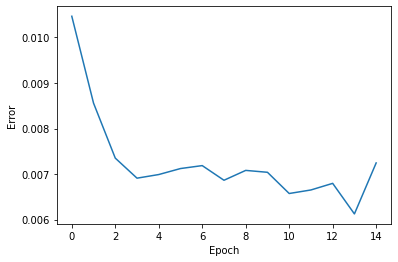

In [22]:
epochs = 15
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_nb
    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_nb}))
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [23]:

#Selecting the input user
inputUser = [trX[75]]

In [24]:
#Feeding in the user and reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={ v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})

In [26]:
hotel_data["Recommendation Score"] = rec[0]
hotel_data.sort_values(["Recommendation Score"], ascending=False).head(20)

,hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index,Recommendation Score
104,105,Americas Best Value Inn-corpus Christi North/a...,910 Corn Product Rd,Corpus Christi,2,NaN,"Hotels,Hotels and motels,Hotel and motel reser...",104,0.278041
92,93,Americas Best Value Inn Pryor,123 S Mill St,Pryor,2,Rs.5075,"Hotels,Lodging,Motels,Hotels and motels,Hotel ...",92,0.114890
122,123,Aqua Beach Inn,1301 Withers Dr,Myrtle Beach,2,Rs.5566,"Hotel,Hotels",122,0.034205
45,46,Ambassadors Inn and Suites,716 21st St,Virginia Beach,2,Rs.4782,Hotels,45,0.026392
36,37,Aloft New Orleans Downtown,225 Baronne St,New Orleans,3,Rs.7656,"Hotels,Lodging,Motels,Hotel",36,0.023785
91,92,Americas Best Value Inn New Philadelphia,181 Bluebell Dr SW,New Philadelphia,2,Rs.4320,"Hotel,Hotels,Lodging,Motels",91,0.022264
193,194,Best Inn Suites,3547 E Van Buren St,Phoenix,NaN,NaN,"Hotels and motels,Hotel and motel reservations...",193,0.017009
166,167,Baymont Inn & Suites Kissimmee,4156 W Vine St,Kissimmee,3,Rs.4597,"Hotels and motels,Hotel and motel reservations...",166,0.016754
179,180,Beachcomber By The Sea,17101 Front Beach Road,Panama City Beach,3,Rs.11167,"Hotels,Hotel",179,0.015198
140,141,Austria Haus Hotel,242 E Meadow Dr,Vail,3,Rs.18484,"Hotels,Hotels and motels,Hotel",140,0.014500
